### Streaming 

Methods : stream() and astream()
- these methods are sync and async methods for straming back results. 

Additional parameters in streaming modes for graph state. 

- **values** : this streams the full state of the graph after each node is called.
- **update** : this streams updates to the state of the graph after each node is called.

![](../images/img3.png)

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import START,END,StateGraph

## reducers 
from langgraph.graph.message import add_messages
from typing import Annotated 


In [2]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

In [7]:
import os 
from dotenv import load_dotenv 
from rich import print
load_dotenv()

from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API")


In [5]:
llm=ChatGroq(model="openai/gpt-oss-120b")

In [9]:
print(llm.invoke("hi my name is abhi , how can you help me ").content)

Hey Abhi! 👋 Nice to meet you.

I’m here to help with a wide range of things, such as:

- **Answering questions** – from science, history, tech, pop culture, and more.
- **Explaining concepts** – break down complex ideas into easy‑to‑understand explanations.
- **Writing assistance** – drafts, edits, brainstorming, creative stories, emails, resumes, etc.
- **Learning & tutoring** – step‑by‑step problem solving, language practice, study tips.
- **Programming help** – code snippets, debugging, algorithm explanations, best practices.
- **Planning & organization** – to‑do lists, schedules, project outlines, travel itineraries.
- **Fun & creativity** – jokes, riddles, puzzles, role‑playing scenarios, brainstorming ideas.

Just let me know what you’re looking for or what you’d like to work on, and we’ll dive right in! 🚀

#### We will start with creating nodes 

In [10]:
from langgraph.checkpoint.memory import MemorySaver 
memory=MemorySaver()

def superbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

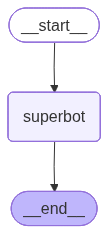

In [15]:
builder=StateGraph(State)

## adding nodes 

builder.add_node("superbot",superbot)


## adding edges 

builder.add_edge(START,"superbot")
builder.add_edge("superbot",END)


## lets build a graph 

graph=builder.compile(checkpointer=memory)
# graph=builder.compile()

from IPython.display import Image,display

display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
## invocation

config={"configurable":{"thread_id":"1"}}

print(graph.invoke({'messages':"hi, my name is abhijit and i like to play cricket."},config=config))

{
    'messages': [
        HumanMessage(
            content='hi, my name is abhijit and i like to play cricket.',
            additional_kwargs={},
            response_metadata={},
            id='0094031e-f4d1-4473-bc32-24525144fc87'
        ),
        AIMessage(
            content="Hey Abhijit! Great to meet you. Cricket is such an exciting sport—whether you’re batting, 
bowling, or just cheering from the stands, there’s always something thrilling happening. Do you have a favorite 
team or player? Or maybe you enjoy playing a particular role on the field? I'd love to hear more!",
            additional_kwargs={
                'reasoning_content': 'The user says hi, introduces themselves. We respond friendly. No disallowed 
content.'
            },
            response_metadata={
                'token_usage': {
                    'completion_tokens': 93,
                    'prompt_tokens': 86,
                    'total_tokens': 179,
                    'completion_time': 0.184845217,
                    'prompt_time': 0.003091451,
                    'queue_time': 0.043731159,
                    'total_time': 0.187936668
                },
                'model_name': 'openai/gpt-oss-120b',
                'system_fingerprint': 'fp_3a688838c3',
                'service_tier': 'on_demand',
                'finish_reason': 'stop',
                'logprobs': None
            },
            id='run--e80554d1-4c10-4f46-99e3-15e977e4bf37-0',
            usage_metadata={'input_tokens': 86, 'output_tokens': 93, 'total_tokens': 179}
        ),
        HumanMessage(
            content='hi, my name is abhijit and i like to play cricket.',
            additional_kwargs={},
            response_metadata={},
            id='d676ab1a-effc-455c-8f14-3031dd106558'
        ),
        AIMessage(
            content="Hey Abhijit! Nice to meet you. 🎉  \n\nCricket is such a fun game—whether you’re out on the 
pitch or cheering from the stands. Do you have a favorite format (Test, ODI, T20) or a team you root for? And what 
role do you enjoy most when you play—batting, bowling, fielding, or maybe keeping wickets? I'd love to hear more 
about your cricket adventures!",
            additional_kwargs={
                'reasoning_content': 'The user repeated greeting. We should respond politely, continue 
conversation, maybe ask about cricket preferences. No disallowed content.'
            },
            response_metadata={
                'token_usage': {
                    'completion_tokens': 124,
                    'prompt_tokens': 177,
                    'total_tokens': 301,
                    'completion_time': 0.256893027,
                    'prompt_time': 0.00662896,
                    'queue_time': 0.043076589,
                    'total_time': 0.263521987
                },
                'model_name': 'openai/gpt-oss-120b',
                'system_fingerprint': 'fp_ed9190d8b7',
                'service_tier': 'on_demand',
                'finish_reason': 'stop',
                'logprobs': None
            },
            id='run--1aaf8ebc-4009-4dbe-99fc-92f4ba575fc0-0',
            usage_metadata={'input_tokens': 177, 'output_tokens': 124, 'total_tokens': 301}
        )
    ]
}

#### Streaming the responses with Stream Method.

In [19]:
config={"configurable":{"thread_id":"2"}}

for chunck in graph.stream({"messages":"hi my name is abhijit and i love to play cricket."},config=config,stream_mode="updates"):
    print(chunck)

{
    'superbot': {
        'messages': [
            AIMessage(
                content='Hey Abhijit! 👋 Great to meet a fellow cricket enthusiast. How’s the game treating you 
these days? Do you play a particular role—batsman, bowler, all‑rounder—or are you more of a fan cheering from the 
stands? Let me know if there’s anything cricket‑related (stats, tips, history, upcoming matches, etc.) that you’d 
like to chat about!',
                additional_kwargs={
                    'reasoning_content': 'The user says "hi my name is abhijit and i love to play cricket." Likely 
they are just greeting. We should respond friendly, ask about cricket, maybe ask how we can help. No disallowed 
content. Just respond.'
                },
                response_metadata={
                    'token_usage': {
                        'completion_tokens': 144,
                        'prompt_tokens': 85,
                        'total_tokens': 229,
                        'completion_time': 0.288909463,
                        'prompt_time': 0.003044653,
                        'queue_time': 0.044143537,
                        'total_time': 0.291954116
                    },
                    'model_name': 'openai/gpt-oss-120b',
                    'system_fingerprint': 'fp_ed9190d8b7',
                    'service_tier': 'on_demand',
                    'finish_reason': 'stop',
                    'logprobs': None
                },
                id='run--6dfa5678-956f-4363-8bac-a172a3d31392-0',
                usage_metadata={'input_tokens': 85, 'output_tokens': 144, 'total_tokens': 229}
            )
        ]
    }
}

In [20]:
config={"configurable":{"thread_id":"2"}}

for chunck in graph.stream({"messages":"hi my name is abhijit and i love to play cricket."},config=config,stream_mode="values"):
    print(chunck)

{
    'messages': [
        HumanMessage(
            content='hi my name is abhijit and i love to play cricket.',
            additional_kwargs={},
            response_metadata={},
            id='69cd77c2-de85-43b7-b44a-1f1f891018f9'
        ),
        AIMessage(
            content='Hey Abhijit! 👋 Great to meet a fellow cricket enthusiast. How’s the game treating you these 
days? Do you play a particular role—batsman, bowler, all‑rounder—or are you more of a fan cheering from the stands?
Let me know if there’s anything cricket‑related (stats, tips, history, upcoming matches, etc.) that you’d like to 
chat about!',
            additional_kwargs={
                'reasoning_content': 'The user says "hi my name is abhijit and i love to play cricket." Likely they
are just greeting. We should respond friendly, ask about cricket, maybe ask how we can help. No disallowed content.
Just respond.'
            },
            response_metadata={
                'token_usage': {
                    'completion_tokens': 144,
                    'prompt_tokens': 85,
                    'total_tokens': 229,
                    'completion_time': 0.288909463,
                    'prompt_time': 0.003044653,
                    'queue_time': 0.044143537,
                    'total_time': 0.291954116
                },
                'model_name': 'openai/gpt-oss-120b',
                'system_fingerprint': 'fp_ed9190d8b7',
                'service_tier': 'on_demand',
                'finish_reason': 'stop',
                'logprobs': None
            },
            id='run--6dfa5678-956f-4363-8bac-a172a3d31392-0',
            usage_metadata={'input_tokens': 85, 'output_tokens': 144, 'total_tokens': 229}
        ),
        HumanMessage(
            content='hi my name is abhijit and i love to play cricket.',
            additional_kwargs={},
            response_metadata={},
            id='42c753a5-2581-4974-a222-716e67237d34'
        )
    ]
}

{
    'messages': [
        HumanMessage(
            content='hi my name is abhijit and i love to play cricket.',
            additional_kwargs={},
            response_metadata={},
            id='69cd77c2-de85-43b7-b44a-1f1f891018f9'
        ),
        AIMessage(
            content='Hey Abhijit! 👋 Great to meet a fellow cricket enthusiast. How’s the game treating you these 
days? Do you play a particular role—batsman, bowler, all‑rounder—or are you more of a fan cheering from the stands?
Let me know if there’s anything cricket‑related (stats, tips, history, upcoming matches, etc.) that you’d like to 
chat about!',
            additional_kwargs={
                'reasoning_content': 'The user says "hi my name is abhijit and i love to play cricket." Likely they
are just greeting. We should respond friendly, ask about cricket, maybe ask how we can help. No disallowed content.
Just respond.'
            },
            response_metadata={
                'token_usage': {
                    'completion_tokens': 144,
                    'prompt_tokens': 85,
                    'total_tokens': 229,
                    'completion_time': 0.288909463,
                    'prompt_time': 0.003044653,
                    'queue_time': 0.044143537,
                    'total_time': 0.291954116
                },
                'model_name': 'openai/gpt-oss-120b',
                'system_fingerprint': 'fp_ed9190d8b7',
                'service_tier': 'on_demand',
                'finish_reason': 'stop',
                'logprobs': None
            },
            id='run--6dfa5678-956f-4363-8bac-a172a3d31392-0',
            usage_metadata={'input_tokens': 85, 'output_tokens': 144, 'total_tokens': 229}
        ),
        HumanMessage(
            content='hi my name is abhijit and i love to play cricket.',
            additional_kwargs={},
            response_metadata={},
            id='42c753a5-2581-4974-a222-716e67237d34'
        ),
        AIMessage(
            content='Hey Abhijit! 👋 Great to meet another cricket fan. Do you have a favorite format—Test, ODI, 
T20—or maybe you’re into backyard cricket with friends? What role do you enjoy most on the field: batting, bowling,
keeping, or all‑rounder duties? If you ever want tips on technique, equipment recommendations, or just want to chat
about the latest matches and stats, I’m here! 🚀🏏',
            additional_kwargs={
                'reasoning_content': 'The user repeated the same message. We can respond similarly, engaging. No 
disallowed content. Provide friendly response.'
            },
            response_metadata={
                'token_usage': {
                    'completion_tokens': 125,
                    'prompt_tokens': 194,
                    'total_tokens': 319,
                    'completion_time': 0.254729189,
                    'prompt_time': 0.014811125,
                    'queue_time': 0.275903444,
                    'total_time': 0.269540314
                },
                'model_name': 'openai/gpt-oss-120b',
                'system_fingerprint': 'fp_3a688838c3',
                'service_tier': 'on_demand',
                'finish_reason': 'stop',
                'logprobs': None
            },
            id='run--b18ed27a-04ed-4e2f-b0dc-81eaf7de7b34-0',
            usage_metadata={'input_tokens': 194, 'output_tokens': 125, 'total_tokens': 319}
        )
    ]
}

In [22]:
config={"configurable":{"thread_id":"2"}}

for chunck in graph.stream({"messages":" i also like football."},config=config,stream_mode="updates"):
    print(chunck)

{
    'superbot': {
        'messages': [
            AIMessage(
                content='That’s fantastic, Abhijit—being into both cricket and football gives you a great mix of 
skills and fun! 🎉  \n\n### Quick Snapshot: What Do You Enjoy Most?  \n| Sport | What you love about it | Your 
favorite role/position | Anything you’re trying to improve? 
|\n|-------|-----------------------|----------------------------|------------------------------------|\n| Cricket |
(e.g., hitting big sixes, bowling spin, fielding) | Batsman / Bowler / All‑rounder / Wicket‑keeper | ☐ |\n| 
Football | (e.g., scoring goals, defending, play‑making) | Striker / Midfielder / Defender / Goalkeeper | ☐ 
|\n\nFeel free to fill in the blanks or just tell me a bit more—whatever you’re comfortable with.  \n\n---\n\n## 
How to Make the Most of Both Sports  \n\n| Area | Why It Matters | Simple Tips to Apply 
|\n|------|----------------|----------------------|\n| **Fitness overlap** | Both sports need aerobic stamina, core
strength, and explosiveness. | 2–3\u202f×\u202fweek HIIT (30\u202fs sprint + 30\u202fs jog) + 2\u202f×\u202fweek 
core circuit (planks, Russian twists, leg raises). |\n| **Skill‑specific drills** | Keeps each sport sharp without 
over‑training the same muscles. | **Cricket:** 10‑min net session focusing on a single shot or line‑and‑length 
bowling. <br>**Football:** 15‑min close‑control dribbling around cones, then a quick shooting combo. |\n| 
**Recovery** | Switching sports can stress joints and muscles in different ways. | Foam‑roll after each session, 
stretch major groups (hamstrings, quads, shoulders), and aim for 7‑9\u202fh sleep. |\n| **Equipment** | Using the 
right gear prevents injuries and improves performance. | Cricket: proper pads, gloves, and a bat that matches your 
swing speed. <br>Football: cleats suited to the surface you play on (firm ground vs. turf) and shin guards. |\n| 
**Scheduling** | Balances practice time and prevents burnout. | Example weekly layout (adjust to your 
calendar):<br>• Mon – Cricket net + strength <br>• Tue – Football technical + cardio <br>• Wed – Rest or light 
mobility <br>• Thu – Cricket fielding + plyometrics <br>• Fri – Football small‑sided game <br>• Sat – Mixed 
conditioning (e.g., agility ladder) <br>• Sun – Rest or light active recovery (walk, yoga). |\n\n---\n\n## Quick 
Dual‑Sport Drills You Can Do in One Session  \n\n| Drill | How It Helps Cricket | How It Helps Football | How to 
Execute (≈15\u202fmin) |\n|-------|---------------------|----------------------|--------------------------|\n| 
**Cone Zig‑Zag Sprint** | Improves footwork for quick singles and running between the wickets. | Boosts 
change‑of‑direction for dribbling and defending. | Set 6 cones 5\u202fm apart in a zig‑zag. Sprint forward, touch 
each cone, shuffle back. Repeat 3\u202f×. |\n| **Box‑Jump + Ball Toss** | Builds explosive power for bowling 
delivery stride. | Increases jump height for headers and aerial duels. | 8\u202f×\u202fbox jumps, then immediately 
toss a cricket ball to a partner (or a football to a wall) and catch/receive it. |\n| **Shadow Batting / Shooting**
| Refines swing mechanics without needing a ball. | Sharpens shooting technique and weight transfer. | Hold your 
bat, go through a full swing, then instantly drop the bat and take a football stance to strike an imaginary ball. 
Do 10 cycles. |\n| **Target Passing** | Enhances throwing accuracy for fielding. | Improves passing precision. | 
Place a target (e.g., a bucket) 12\u202fm away. Throw a cricket ball aiming for the target (3 reps), then 
immediately pass a football to the same spot (3 reps). Repeat. |\n\n---\n\n## What Would You Like to Dive Into 
Next?  \n\n- **Batting tips** (e.g., playing spin, perfecting the cover drive)  \n- **Bowling drills** (fast‑ball 
rhythm, wrist‑spin variations)  \n- **Football skills** (first‑touch control, finishing under pressure)  \n- 
**Fitness program** tailored for a dual‑sport athlete  \n- **Gear recommend

In [23]:
config={"configurable":{"thread_id":"2"}}

for chunck in graph.stream({"messages":"I love sports "},config=config,stream_mode="values"):
    print(chunck)

{
    'messages': [
        HumanMessage(
            content='hi my name is abhijit and i love to play cricket.',
            additional_kwargs={},
            response_metadata={},
            id='69cd77c2-de85-43b7-b44a-1f1f891018f9'
        ),
        AIMessage(
            content='Hey Abhijit! 👋 Great to meet a fellow cricket enthusiast. How’s the game treating you these 
days? Do you play a particular role—batsman, bowler, all‑rounder—or are you more of a fan cheering from the stands?
Let me know if there’s anything cricket‑related (stats, tips, history, upcoming matches, etc.) that you’d like to 
chat about!',
            additional_kwargs={
                'reasoning_content': 'The user says "hi my name is abhijit and i love to play cricket." Likely they
are just greeting. We should respond friendly, ask about cricket, maybe ask how we can help. No disallowed content.
Just respond.'
            },
            response_metadata={
                'token_usage': {
                    'completion_tokens': 144,
                    'prompt_tokens': 85,
                    'total_tokens': 229,
                    'completion_time': 0.288909463,
                    'prompt_time': 0.003044653,
                    'queue_time': 0.044143537,
                    'total_time': 0.291954116
                },
                'model_name': 'openai/gpt-oss-120b',
                'system_fingerprint': 'fp_ed9190d8b7',
                'service_tier': 'on_demand',
                'finish_reason': 'stop',
                'logprobs': None
            },
            id='run--6dfa5678-956f-4363-8bac-a172a3d31392-0',
            usage_metadata={'input_tokens': 85, 'output_tokens': 144, 'total_tokens': 229}
        ),
        HumanMessage(
            content='hi my name is abhijit and i love to play cricket.',
            additional_kwargs={},
            response_metadata={},
            id='42c753a5-2581-4974-a222-716e67237d34'
        ),
        AIMessage(
            content='Hey Abhijit! 👋 Great to meet another cricket fan. Do you have a favorite format—Test, ODI, 
T20—or maybe you’re into backyard cricket with friends? What role do you enjoy most on the field: batting, bowling,
keeping, or all‑rounder duties? If you ever want tips on technique, equipment recommendations, or just want to chat
about the latest matches and stats, I’m here! 🚀🏏',
            additional_kwargs={
                'reasoning_content': 'The user repeated the same message. We can respond similarly, engaging. No 
disallowed content. Provide friendly response.'
            },
            response_metadata={
                'token_usage': {
                    'completion_tokens': 125,
                    'prompt_tokens': 194,
                    'total_tokens': 319,
                    'completion_time': 0.254729189,
                    'prompt_time': 0.014811125,
                    'queue_time': 0.275903444,
                    'total_time': 0.269540314
                },
                'model_name': 'openai/gpt-oss-120b',
                'system_fingerprint': 'fp_3a688838c3',
                'service_tier': 'on_demand',
                'finish_reason': 'stop',
                'logprobs': None
            },
            id='run--b18ed27a-04ed-4e2f-b0dc-81eaf7de7b34-0',
            usage_metadata={'input_tokens': 194, 'output_tokens': 125, 'total_tokens': 319}
        ),
        HumanMessage(
            content=' i also like to play football.',
            additional_kwargs={},
            response_metadata={},
            id='2300298e-c09a-418c-964a-f5742d2823d2'
        ),
        AIMessage(
            content='That’s awesome—being a dual‑sport player keeps things exciting! 🎉\n\n### Cricket vs. 
Football\n| Aspect | Cricket | Football |\n|--------|---------|----------|\n| Preferred format/position | (e.g., 
T20 opener, spin bowler, keeper) | (e.g., striker, centre‑back, midfielder) |\n| Typical training focus | Hand‑eye 
coordination, footwork, stamina | Agili

{
    'messages': [
        HumanMessage(
            content='hi my name is abhijit and i love to play cricket.',
            additional_kwargs={},
            response_metadata={},
            id='69cd77c2-de85-43b7-b44a-1f1f891018f9'
        ),
        AIMessage(
            content='Hey Abhijit! 👋 Great to meet a fellow cricket enthusiast. How’s the game treating you these 
days? Do you play a particular role—batsman, bowler, all‑rounder—or are you more of a fan cheering from the stands?
Let me know if there’s anything cricket‑related (stats, tips, history, upcoming matches, etc.) that you’d like to 
chat about!',
            additional_kwargs={
                'reasoning_content': 'The user says "hi my name is abhijit and i love to play cricket." Likely they
are just greeting. We should respond friendly, ask about cricket, maybe ask how we can help. No disallowed content.
Just respond.'
            },
            response_metadata={
                'token_usage': {
                    'completion_tokens': 144,
                    'prompt_tokens': 85,
                    'total_tokens': 229,
                    'completion_time': 0.288909463,
                    'prompt_time': 0.003044653,
                    'queue_time': 0.044143537,
                    'total_time': 0.291954116
                },
                'model_name': 'openai/gpt-oss-120b',
                'system_fingerprint': 'fp_ed9190d8b7',
                'service_tier': 'on_demand',
                'finish_reason': 'stop',
                'logprobs': None
            },
            id='run--6dfa5678-956f-4363-8bac-a172a3d31392-0',
            usage_metadata={'input_tokens': 85, 'output_tokens': 144, 'total_tokens': 229}
        ),
        HumanMessage(
            content='hi my name is abhijit and i love to play cricket.',
            additional_kwargs={},
            response_metadata={},
            id='42c753a5-2581-4974-a222-716e67237d34'
        ),
        AIMessage(
            content='Hey Abhijit! 👋 Great to meet another cricket fan. Do you have a favorite format—Test, ODI, 
T20—or maybe you’re into backyard cricket with friends? What role do you enjoy most on the field: batting, bowling,
keeping, or all‑rounder duties? If you ever want tips on technique, equipment recommendations, or just want to chat
about the latest matches and stats, I’m here! 🚀🏏',
            additional_kwargs={
                'reasoning_content': 'The user repeated the same message. We can respond similarly, engaging. No 
disallowed content. Provide friendly response.'
            },
            response_metadata={
                'token_usage': {
                    'completion_tokens': 125,
                    'prompt_tokens': 194,
                    'total_tokens': 319,
                    'completion_time': 0.254729189,
                    'prompt_time': 0.014811125,
                    'queue_time': 0.275903444,
                    'total_time': 0.269540314
                },
                'model_name': 'openai/gpt-oss-120b',
                'system_fingerprint': 'fp_3a688838c3',
                'service_tier': 'on_demand',
                'finish_reason': 'stop',
                'logprobs': None
            },
            id='run--b18ed27a-04ed-4e2f-b0dc-81eaf7de7b34-0',
            usage_metadata={'input_tokens': 194, 'output_tokens': 125, 'total_tokens': 319}
        ),
        HumanMessage(
            content=' i also like to play football.',
            additional_kwargs={},
            response_metadata={},
            id='2300298e-c09a-418c-964a-f5742d2823d2'
        ),
        AIMessage(
            content='That’s awesome—being a dual‑sport player keeps things exciting! 🎉\n\n### Cricket vs. 
Football\n| Aspect | Cricket | Football |\n|--------|---------|----------|\n| Preferred format/position | (e.g., 
T20 opener, spin bowler, keeper) | (e.g., striker, centre‑back, midfielder) |\n| Typical training focus | Hand‑eye 
coordination, footwork, stamina | Agili

#### Streaming The responses with astream Method 

Streaming tokens we often want to stream more than graph state 

in particular , with chat models calls it is common to stream the tokens as they are generated.

we can do using astream_event method , which streams back events as they happen inside nodes! 

Each event is a dict with a few keys :

- event: this is a type of event that is being emitted 

- name: This is name of the event.

- data: this is the data associated with the event 

- metadata: contains langgraph nodes , the node emitting the event 

In [24]:
config={"configurable":{"thread_id":"3"}}

In [25]:
async for event in graph.astream_events({"messages":["Hi my name is abhijit rao and i love u play cricket "]},config=config,version="v2"):
    print(event)

{
    'event': 'on_chain_start',
    'data': {'input': {'messages': ['Hi my name is abhijit rao and i love u play cricket ']}},
    'name': 'LangGraph',
    'tags': [],
    'run_id': 'c8700457-1486-4f84-9087-191e91ecc1ef',
    'metadata': {'thread_id': '3'},
    'parent_ids': []
}

{
    'event': 'on_chain_start',
    'data': {
        'input': {
            'messages': [
                HumanMessage(
                    content='Hi my name is abhijit rao and i love u play cricket ',
                    additional_kwargs={},
                    response_metadata={},
                    id='2fae046f-22e9-4862-b2a0-58c2d52cb275'
                )
            ]
        }
    },
    'name': 'superbot',
    'tags': ['graph:step:1'],
    'run_id': '5f91670b-efb8-4cc2-af6e-451b3301a4b9',
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284'
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef']
}

{
    'event': 'on_chat_model_start',
    'data': {
        'input': {
            'messages': [
                [
                    HumanMessage(
                        content='Hi my name is abhijit rao and i love u play cricket ',
                        additional_kwargs={},
                        response_metadata={},
                        id='2fae046f-22e9-4862-b2a0-58c2d52cb275'
                    )
                ]
            ]
        }
    },
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': 'The'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' user'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' says'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ':'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' "'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': 'Hi'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' my'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' name'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' is'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' abh'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': 'ij'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': 'it'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' r'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': 'ao'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' and'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' i'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' love'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' u'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' play'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' cricket'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': '".'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' Probably'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' they'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' are'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' greeting'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' and'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' stating'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' they'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' love'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' cricket'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': '.'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' We'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' should'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' respond'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' politely'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ','},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' maybe'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' ask'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' about'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' cricket'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' preferences'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': '.'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' No'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' dis'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': 'allowed'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' content'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': '.'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' Just'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' a'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' friendly'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': ' reply'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={'reasoning_content': '.'},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='Hi',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' Ab',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='h',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='ij',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='it',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' Rao',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='!',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' 👋',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' It',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='’s',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' great',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' to',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' meet',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' you',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='.',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' Cricket',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' is',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' such',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' an',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' exciting',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' sport',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='—',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='whether',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' you',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='’re',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' into',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' batting',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=',',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' bowling',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=',',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' or',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' just',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' cheering',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' from',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' the',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' stands',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=',',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' there',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='’s',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' always',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' something',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' thrilling',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' happening',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='.',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' Do',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' you',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' have',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' a',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' favorite',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' team',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' or',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' player',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='?',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' Or',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' maybe',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' a',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' memorable',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' match',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' you',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='’ve',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' watched',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' or',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' played',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' in',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='?',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' I',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='’d',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' love',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' to',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' hear',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content=' more',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='!',
            additional_kwargs={},
            response_metadata={},
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba'
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_stream',
    'data': {
        'chunk': AIMessageChunk(
            content='',
            additional_kwargs={},
            response_metadata={
                'finish_reason': 'stop',
                'model_name': 'openai/gpt-oss-120b',
                'system_fingerprint': 'fp_3a688838c3',
                'service_tier': 'on_demand'
            },
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
            usage_metadata={'input_tokens': 87, 'output_tokens': 135, 'total_tokens': 222}
        )
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chat_model_end',
    'data': {
        'output': AIMessage(
            content='Hi Abhijit Rao! 👋 It’s great to meet you. Cricket is such an exciting sport—whether you’re 
into batting, bowling, or just cheering from the stands, there’s always something thrilling happening. Do you have 
a favorite team or player? Or maybe a memorable match you’ve watched or played in? I’d love to hear more!',
            additional_kwargs={
                'reasoning_content': 'The user says: "Hi my name is abhijit rao and i love u play cricket". 
Probably they are greeting and stating they love cricket. We should respond politely, maybe ask about cricket 
preferences. No disallowed content. Just a friendly reply.'
            },
            response_metadata={
                'finish_reason': 'stop',
                'model_name': 'openai/gpt-oss-120b',
                'system_fingerprint': 'fp_3a688838c3',
                'service_tier': 'on_demand'
            },
            id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
            usage_metadata={'input_tokens': 87, 'output_tokens': 135, 'total_tokens': 222}
        ),
        'input': {
            'messages': [
                [
                    HumanMessage(
                        content='Hi my name is abhijit rao and i love u play cricket ',
                        additional_kwargs={},
                        response_metadata={},
                        id='2fae046f-22e9-4862-b2a0-58c2d52cb275'
                    )
                ]
            ]
        }
    },
    'run_id': '40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
    'name': 'ChatGroq',
    'tags': ['seq:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284',
        'ls_provider': 'groq',
        'ls_model_name': 'openai/gpt-oss-120b',
        'ls_model_type': 'chat',
        'ls_temperature': 0.7
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef', '5f91670b-efb8-4cc2-af6e-451b3301a4b9']
}

{
    'event': 'on_chain_stream',
    'run_id': '5f91670b-efb8-4cc2-af6e-451b3301a4b9',
    'name': 'superbot',
    'tags': ['graph:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284'
    },
    'data': {
        'chunk': {
            'messages': [
                AIMessage(
                    content='Hi Abhijit Rao! 👋 It’s great to meet you. Cricket is such an exciting sport—whether 
you’re into batting, bowling, or just cheering from the stands, there’s always something thrilling happening. Do 
you have a favorite team or player? Or maybe a memorable match you’ve watched or played in? I’d love to hear 
more!',
                    additional_kwargs={
                        'reasoning_content': 'The user says: "Hi my name is abhijit rao and i love u play cricket".
Probably they are greeting and stating they love cricket. We should respond politely, maybe ask about cricket 
preferences. No disallowed content. Just a friendly reply.'
                    },
                    response_metadata={
                        'finish_reason': 'stop',
                        'model_name': 'openai/gpt-oss-120b',
                        'system_fingerprint': 'fp_3a688838c3',
                        'service_tier': 'on_demand'
                    },
                    id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
                    usage_metadata={'input_tokens': 87, 'output_tokens': 135, 'total_tokens': 222}
                )
            ]
        }
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef']
}

{
    'event': 'on_chain_end',
    'data': {
        'output': {
            'messages': [
                AIMessage(
                    content='Hi Abhijit Rao! 👋 It’s great to meet you. Cricket is such an exciting sport—whether 
you’re into batting, bowling, or just cheering from the stands, there’s always something thrilling happening. Do 
you have a favorite team or player? Or maybe a memorable match you’ve watched or played in? I’d love to hear 
more!',
                    additional_kwargs={
                        'reasoning_content': 'The user says: "Hi my name is abhijit rao and i love u play cricket".
Probably they are greeting and stating they love cricket. We should respond politely, maybe ask about cricket 
preferences. No disallowed content. Just a friendly reply.'
                    },
                    response_metadata={
                        'finish_reason': 'stop',
                        'model_name': 'openai/gpt-oss-120b',
                        'system_fingerprint': 'fp_3a688838c3',
                        'service_tier': 'on_demand'
                    },
                    id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
                    usage_metadata={'input_tokens': 87, 'output_tokens': 135, 'total_tokens': 222}
                )
            ]
        },
        'input': {
            'messages': [
                HumanMessage(
                    content='Hi my name is abhijit rao and i love u play cricket ',
                    additional_kwargs={},
                    response_metadata={},
                    id='2fae046f-22e9-4862-b2a0-58c2d52cb275'
                )
            ]
        }
    },
    'run_id': '5f91670b-efb8-4cc2-af6e-451b3301a4b9',
    'name': 'superbot',
    'tags': ['graph:step:1'],
    'metadata': {
        'thread_id': '3',
        'langgraph_step': 1,
        'langgraph_node': 'superbot',
        'langgraph_triggers': ('branch:to:superbot',),
        'langgraph_path': ('__pregel_pull', 'superbot'),
        'langgraph_checkpoint_ns': 'superbot:92123de5-d242-d308-3502-43e19129b284'
    },
    'parent_ids': ['c8700457-1486-4f84-9087-191e91ecc1ef']
}

{
    'event': 'on_chain_stream',
    'run_id': 'c8700457-1486-4f84-9087-191e91ecc1ef',
    'name': 'LangGraph',
    'tags': [],
    'metadata': {'thread_id': '3'},
    'data': {
        'chunk': {
            'superbot': {
                'messages': [
                    AIMessage(
                        content='Hi Abhijit Rao! 👋 It’s great to meet you. Cricket is such an exciting 
sport—whether you’re into batting, bowling, or just cheering from the stands, there’s always something thrilling 
happening. Do you have a favorite team or player? Or maybe a memorable match you’ve watched or played in? I’d love 
to hear more!',
                        additional_kwargs={
                            'reasoning_content': 'The user says: "Hi my name is abhijit rao and i love u play 
cricket". Probably they are greeting and stating they love cricket. We should respond politely, maybe ask about 
cricket preferences. No disallowed content. Just a friendly reply.'
                        },
                        response_metadata={
                            'finish_reason': 'stop',
                            'model_name': 'openai/gpt-oss-120b',
                            'system_fingerprint': 'fp_3a688838c3',
                            'service_tier': 'on_demand'
                        },
                        id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
                        usage_metadata={'input_tokens': 87, 'output_tokens': 135, 'total_tokens': 222}
                    )
                ]
            }
        }
    },
    'parent_ids': []
}

{
    'event': 'on_chain_end',
    'data': {
        'output': {
            'messages': [
                HumanMessage(
                    content='Hi my name is abhijit rao and i love u play cricket ',
                    additional_kwargs={},
                    response_metadata={},
                    id='2fae046f-22e9-4862-b2a0-58c2d52cb275'
                ),
                AIMessage(
                    content='Hi Abhijit Rao! 👋 It’s great to meet you. Cricket is such an exciting sport—whether 
you’re into batting, bowling, or just cheering from the stands, there’s always something thrilling happening. Do 
you have a favorite team or player? Or maybe a memorable match you’ve watched or played in? I’d love to hear 
more!',
                    additional_kwargs={
                        'reasoning_content': 'The user says: "Hi my name is abhijit rao and i love u play cricket".
Probably they are greeting and stating they love cricket. We should respond politely, maybe ask about cricket 
preferences. No disallowed content. Just a friendly reply.'
                    },
                    response_metadata={
                        'finish_reason': 'stop',
                        'model_name': 'openai/gpt-oss-120b',
                        'system_fingerprint': 'fp_3a688838c3',
                        'service_tier': 'on_demand'
                    },
                    id='run--40b43a77-b8bc-4dfc-bf75-71a4122b8eba',
                    usage_metadata={'input_tokens': 87, 'output_tokens': 135, 'total_tokens': 222}
                )
            ]
        }
    },
    'run_id': 'c8700457-1486-4f84-9087-191e91ecc1ef',
    'name': 'LangGraph',
    'tags': [],
    'metadata': {'thread_id': '3'},
    'parent_ids': []
}